In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class BasicNN(nn.Module):

  def __init__(self):
    super().__init__()

    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad = False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)

    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

    self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad = False)

  
  def forward(self, input):

    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)


    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)

    scaled_top_relu_output = top_relu_output * self.w01
    scaled_bottom_relu_output = bottom_relu_output * self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

    return F.relu(input_to_final_relu)

In [3]:
model = BasicNN()

input_doses = torch.linspace(0, 1, 11)
print(input_doses)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


<Axes: >

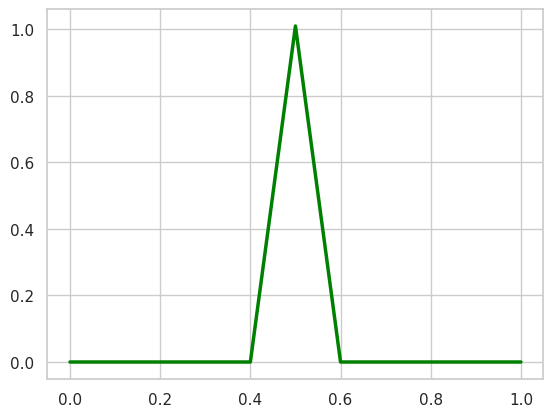

In [4]:
output_values = model(input_doses)

print(output_values)

sns.set(style = "whitegrid")

sns.lineplot(x = input_doses, y = output_values, color = 'green', linewidth = 2.5)

In [15]:
class BasicNNTrain(nn.Module):

  def __init__(self):
    super().__init__()

    self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad = False)
    self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad = False)

    self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad = False)
    self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad = False)

    self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad = False)
    self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad = False)

    self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad = True)

  
  def forward(self, input):

    input_to_top_relu = input * self.w00 + self.b00
    top_relu_output = F.relu(input_to_top_relu)


    input_to_bottom_relu = input * self.w10 + self.b10
    bottom_relu_output = F.relu(input_to_bottom_relu)

    scaled_top_relu_output = top_relu_output * self.w01
    scaled_bottom_relu_output = bottom_relu_output * self.w11

    input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

    return F.relu(input_to_final_relu)

<Axes: >

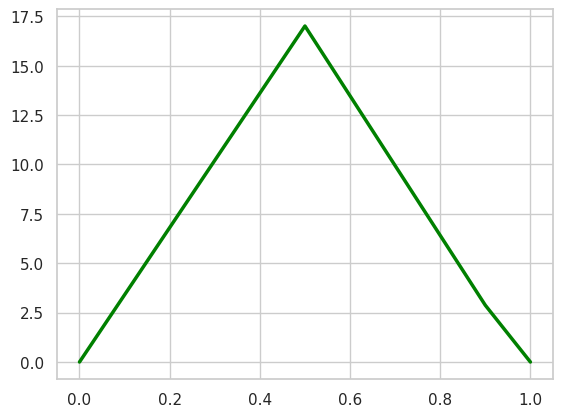

In [16]:
model = BasicNNTrain()

input_doses = torch.linspace(0, 1, 11)
output_values = model(input_doses)

sns.set(style = "whitegrid")

sns.lineplot(x = input_doses, y = output_values.detach(), color = 'green', linewidth = 2.5)

In [17]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

optimizer = SGD(model.parameters(), lr = 0.01)

for epoch in range(1000):

  total_loss = 0

  for iteration in range(len(inputs)):
    
    input_i = inputs[iteration]
    label_i = labels[iteration]

    output_i = model(input_i)

    loss = (output_i - label_i) ** 2

    loss.backward()

    total_loss += float(loss)

  optimizer.step()
  optimizer.zero_grad()

  print("Step : " + str(epoch) + " Final Bias: " + str(model.final_bias.data) + "\n")

Step : 0 Final Bias: tensor(-0.3202)

Step : 1 Final Bias: tensor(-0.6340)

Step : 2 Final Bias: tensor(-0.9415)

Step : 3 Final Bias: tensor(-1.2429)

Step : 4 Final Bias: tensor(-1.5382)

Step : 5 Final Bias: tensor(-1.8277)

Step : 6 Final Bias: tensor(-2.1113)

Step : 7 Final Bias: tensor(-2.3893)

Step : 8 Final Bias: tensor(-2.6617)

Step : 9 Final Bias: tensor(-2.9287)

Step : 10 Final Bias: tensor(-3.1903)

Step : 11 Final Bias: tensor(-3.4467)

Step : 12 Final Bias: tensor(-3.6980)

Step : 13 Final Bias: tensor(-3.9442)

Step : 14 Final Bias: tensor(-4.1855)

Step : 15 Final Bias: tensor(-4.4220)

Step : 16 Final Bias: tensor(-4.6538)

Step : 17 Final Bias: tensor(-4.8809)

Step : 18 Final Bias: tensor(-5.1035)

Step : 19 Final Bias: tensor(-5.3216)

Step : 20 Final Bias: tensor(-5.5354)

Step : 21 Final Bias: tensor(-5.7449)

Step : 22 Final Bias: tensor(-5.9502)

Step : 23 Final Bias: tensor(-6.1514)

Step : 24 Final Bias: tensor(-6.3485)

Step : 25 Final Bias: tensor(-6.541

<Axes: >

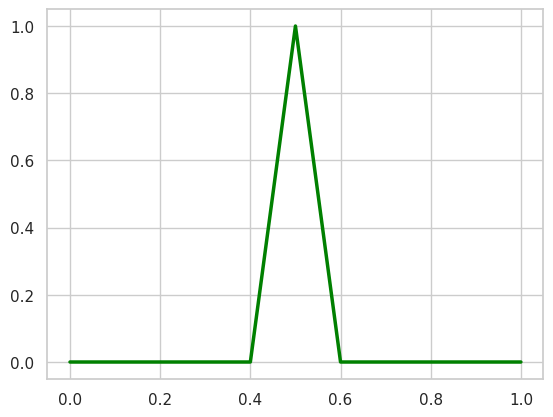

In [18]:
input_doses = torch.linspace(0, 1, 11)
output_values = model(input_doses)

sns.set(style = "whitegrid")

sns.lineplot(x = input_doses, y = output_values.detach(), color = 'green', linewidth = 2.5)